In [1]:
import sys
sys.path.append('../../')

In [2]:
from src.classes.vid_loader import VidLoader 
from src.classes.pred_loader import PredLoader
from src.classes.job_loader import JobLoader

In [3]:
color_id = 'collar' # or 'dyed' these are the two options

In [4]:
# get all of the videos 
# vids = VidLoader(color_type=color_id, out=False)
# preds = PredLoader.from_vids(color_type=color_id, vid_loader=vids)
# only have to get preds from vid the first time to create df then can use:
preds = PredLoader(color_id + '_preds_df.csv') # , color_type=color_id)
jobs = JobLoader(color_id + '_preds_df.csv', color_type=color_id)

In [8]:
inst = 'multi' # or 'single'
color_pair = 'RB' # RG and YB!! # can put None or leave blank for single inst
write = False # will write script to job directory specified in global utils

In [9]:
# for all color pairs you want to generate jobs for
job_commands = jobs.get_job_script(inst=inst, color_pair=color_pair, write=write, redo=True)

In [10]:
job_commands

'module load miniconda; conda activate sleap; cd /gpfs/radev/pi/saxena/aj764/;sleap-track "/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/021825_PairedTesting_TimeOut_DREADD_KL010-KL013R_SAL-SAL/Videos/021825_Cam2_TrNum4_Coop_KL010B-KL013R_SAL-SAL.mp4" --first-gpu -o "/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/021825_PairedTesting_TimeOut_DREADD_KL010-KL013R_SAL-SAL/Tracking/slp/021825_Cam2_TrNum4_Coop_KL010B-KL013R_SAL-SAL.predictions.slp" -m "" -m ""; sleap-convert --format analysis -o "/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/021825_PairedTesting_TimeOut_DREADD_KL010-KL013R_SAL-SAL/Tracking/h5/021825_Cam2_TrNum4_Coop_KL010B-KL013R_SAL-SAL.predictions.h5" "/gpfs/radev/pi/saxena/aj764/PairedTestingSessions/021825_PairedTesting_TimeOut_DREADD_KL010-KL013R_SAL-SAL/Tracking/slp/021825_Cam2_TrNum4_Coop_KL010B-KL013R_SAL-SAL.predictions.slp"\nmodule load miniconda; conda activate sleap; cd /gpfs/radev/pi/saxena/aj764/;sleap-track "/gpfs/radev/pi/saxena/aj764/PairedTestin

In [16]:
# here you are running dsq jobs! then get the progress
jobs.get_progress(inst, color_pair)

0.0% of videos from YB have been tracked (0 tracked videos, 10 untracked videos)


In [ ]:
print(job_commands)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
x = pd.read_csv('collar_preds_df_old.csv')

In [11]:
# for index, row in x.iterrows():
#     if row['single/multi'] == 'multi' and row['color pair'] == color_pair:
#         df.at[index, 'initial nan'] =
#         df.at[index, 'vel nan'] =

percent of RG vids below 30% threshold:
0.8269230769230769
percent of RG vids below 20% threshold:
0.5897435897435898
percent of YB vids below 30% threshold:
0.20689655172413793
percent of YB vids below 20% threshold:
0.0


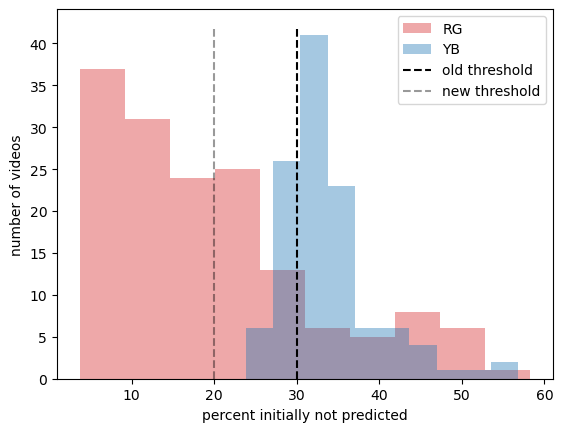

In [12]:
plt.hist(100 * x[x['pred'] & (x['color pair'] == 'RG')]['initial nan'], color='tab:red', alpha=0.4, label='RG')
plt.hist(100 * x[x['pred'] & (x['color pair'] == 'YB')]['initial nan'], color='tab:blue', alpha=0.4, label='YB')
plt.xlabel("percent initially not predicted")
plt.ylabel("number of videos")
plt.vlines(30, 0, 42, 'k', linestyle='dashed', label='old threshold')
plt.vlines(20, 0, 42, 'k', linestyle='dashed', alpha=0.4, label='new threshold')
plt.legend()
print('percent of RG vids below 30% threshold:')
print(x[x['pred'] & (x['color pair'] == 'RG') & (x['initial nan'] < 0.3)].shape[0] / x[x['pred'] & (x['color pair'] == 'RG')].shape[0])
print('percent of RG vids below 20% threshold:')
print(x[x['pred'] & (x['color pair'] == 'RG') & (x['initial nan'] < 0.2)].shape[0] / x[x['pred'] & (x['color pair'] == 'RG')].shape[0])

print('percent of YB vids below 30% threshold:')
print(x[x['pred'] & (x['color pair'] == 'YB') & (x['initial nan'] < 0.3)].shape[0] / x[x['pred'] & (x['color pair'] == 'YB')].shape[0])
print('percent of YB vids below 20% threshold:')
print(x[x['pred'] & (x['color pair'] == 'YB') & (x['initial nan'] < 0.2)].shape[0] / x[x['pred'] & (x['color pair'] == 'YB')].shape[0])


In [5]:
# only try to update the rows that don't have a prediction
for index, row in x.iterrows():
    tt = TESTDIR if row['test/train'] == 'test' else TRAINDIR
    path = ROOTDIR + tt + row['session'] + '/Tracking/slp/' + row['vid'] + 'predictions.slp'
    corr_path = ROOTDIR + tt + row['session'] + '/Tracking/slp/' + row['vid'] + '.predictions.slp'
    if os.path.exists(path):
        print(f'mv {path} {corr_path}')

    path = ROOTDIR + tt + row['session'] + '/Tracking/h5/' + row['vid'] + 'predictions.h5'
    corr_path = ROOTDIR + tt + row['session'] + '/Tracking/h5/' + row['vid'] + '.predictions.h5'
    if os.path.exists(path):
        print(f'mv {path} {corr_path}')


mv /gpfs/radev/pi/saxena/aj764/Training_COOPERATION/020625/Tracking/slp/020625_COOPTRAIN_LARGEARENA_NF020B-NF020Y_Camera4predictions.slp /gpfs/radev/pi/saxena/aj764/Training_COOPERATION/020625/Tracking/slp/020625_COOPTRAIN_LARGEARENA_NF020B-NF020Y_Camera4.predictions.slp


In [23]:
jobs.df[(jobs.df['pred'] == False) & (jobs.df['color pair'] == 'YB')]

,vid,session,single/multi,test/train,pred,color pair,initial nan,vel nan,correct,final nan
345,020625_COOPTRAIN_LARGEARENA_NF020B-NF020Y_Camera4,020625,multi,train,False,YB,-1,-1,False,-1
